#### **Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [4]:
# Initialization
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#### **Downloading the Dependencies**
* I prefer to download all necessary Libraries and Dependencies on one particular cell which mainly focus on Libraries and Dependencies.

In [30]:
# Downloading and loading the Libraries and Dependencies
# !pip install jupyterthemes
# !pip install WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from IPython.display import display
from jupyterthemes import jtplot
jtplot.style(theme = "monokai", context = "notebook", ticks = True, grid = False)
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
import nltk, re
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


from collections import Counter
import operator
import plotly.express as px
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Input, Dense, TimeDistributed, RepeatVector, Bidirectional, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Getting the Data**
* I have manually downloaded the Data. I am using Google Colab for this Project so the act of reading and loading the Data might be different in differnt platforms.

In [6]:
# Loading and Reading the Data
PATH = "/content/drive/My Drive/Colab Notebooks/Language"

# Creating English Language DataFrame
df_english = pd.read_csv(os.path.join(PATH, "small_vocab_en.csv"), sep = "/t", names = ['english'])
# Creating French Language DataFrame
df_french = pd.read_csv(os.path.join(PATH, "small_vocab_fr.csv"), sep = "/t", names = ['french'])

**Inspecting the DataFrame**
* Now, I am going to take the overview of the DataFrame defined above and I will walk through each process so you can gain more insights from it.

In [7]:
# Inspecting the English language DataFrame
display(df_english.head(10));
df_english.shape

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."
5,"his favorite fruit is the orange , but my favo..."
6,"paris is relaxing during december , but it is ..."
7,"new jersey is busy during spring , and it is n..."
8,"our least liked fruit is the lemon , but my le..."
9,the united states is sometimes busy during jan...


(137860, 1)

In [8]:
# Inspecting the French language DataFrame
display(df_french.head(10));
df_french.shape

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."
5,"son fruit préféré est l'orange , mais mon préf..."
6,"paris est relaxant en décembre , mais il est g..."
7,"new jersey est occupé au printemps , et il est..."
8,"notre fruit est moins aimé le citron , mais mo..."
9,"les états-unis est parfois occupé en janvier ,..."


(137860, 1)

### **Exploratory Data Analysis**
**Statistical Exploration**

In [9]:
# Observing the null values in English languge DataFrame
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [10]:
# Observing the null values in French language DataFrame
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


* As the result obtained in above exploration, Both of the DataFrames viz. English Language DataFrame and French Language DataFrame have 137860 rows and 1 columns. There is no null values in any of the DataFrames. As both of the DataFrames have equal number of rows, I can concatenate both of the DataFrames for convenience.

**Concatenating the DataFrames**
* Concatenating the English Language DataFrames and French Language DataFrames.

In [11]:
# Concatenate the English and French Language DataFrames
data = pd.concat([df_english, df_french], axis=1)

# Inspecting the DataFrame
display(data.head(10));
data.shape

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
5,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."
6,"paris is relaxing during december , but it is ...","paris est relaxant en décembre , mais il est g..."
7,"new jersey is busy during spring , and it is n...","new jersey est occupé au printemps , et il est..."
8,"our least liked fruit is the lemon , but my le...","notre fruit est moins aimé le citron , mais mo..."
9,the united states is sometimes busy during jan...,"les états-unis est parfois occupé en janvier ,..."


(137860, 2)

**Data Cleaning**

* Removing the Punctuations from both English and French Languages from the DataFrame obtained above. The english and french columns obtained above has different types of punctuations such as comma, colon and so on. 

In [12]:
# Removing Punctuations 
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [13]:
# Removing the punctuations from english columns
data["english"] = data["english"].apply(remove_punc)
# Removing the punctuations from french columns
data["french"] = data["french"].apply(remove_punc)

In [14]:
# Inspecting the DataFrames
data.head(15)

,english,french
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,california is usually quiet during march and ...,california est généralement calme en mars et ...
3,the united states is sometimes mild during jun...,les états-unis est parfois légère en juin et ...
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...
5,his favorite fruit is the orange but my favor...,son fruit préféré est l'orange mais mon préfé...
6,paris is relaxing during december but it is u...,paris est relaxant en décembre mais il est gé...
7,new jersey is busy during spring and it is ne...,new jersey est occupé au printemps et il est ...
8,our least liked fruit is the lemon but my lea...,notre fruit est moins aimé le citron mais mon...
9,the united states is sometimes busy during jan...,les états-unis est parfois occupé en janvier ...


* Calculating the number of unique words in the English and French columns of the DataFrame.

In [15]:
# Calculating the unique words in the DataFrame.
english_words = []
french_words = []

def unique_word(x, word_list):
  for word in x.split():
    if word not in word_list:
      word_list.append(word)

# Calculating the number of unique words in English column of the DataFrame
data["english"].apply(lambda x:unique_word(x, english_words))
data["french"].apply(lambda x:unique_word(x, french_words))

# Calculating the number of unique words in english and french columns of the DataFrame
print(f"Number of English unique words is {len(english_words)}")
print(f"Number of French unique words is {len(french_words)}")

Number of English unique words is 199
Number of French unique words is 350


**Data Visualization**


* Obtaining the list of words present in the DataFrames.

In [16]:
# Obtaining the list of English words.
words = []
for i in data["english"]:
  for word in i.split():
    words.append(word)

# Calculating the number of words obtained in the list.
print(len(words))
print(words[:10])

1552503
['new', 'jersey', 'is', 'sometimes', 'quiet', 'during', 'autumn', 'and', 'it', 'is']


* Obtaining the Total Count of English words using Counter.

In [17]:
# Obtaining the total counts of the English words
english_words = Counter(words)
english_words

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

* Sorting the Dictionary obtained above in descending order.

In [18]:
# Sorting the Dictionary
sorted_english = sorted(english_words.items(), key=operator.itemgetter(1), reverse=True)

# Inspecting the Dictionary
sorted_english

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [19]:
# Separating the key value pairs from the Dictionary
english_word = []
english_count = []

for i in range(len(sorted_english)):
  english_word.append(sorted_english[i][0])
  english_count.append(sorted_english[i][1])

# Inspecting the Words and Counts of English language.
english_word[:20], english_count[:20]

(['is',
  'in',
  'it',
  'during',
  'the',
  'but',
  'and',
  'sometimes',
  'usually',
  'never',
  'favorite',
  'least',
  'fruit',
  'most',
  'loved',
  'liked',
  'new',
  'paris',
  'india',
  'united'],
 [205858,
  75525,
  75137,
  74933,
  67628,
  63987,
  59850,
  37746,
  37507,
  37500,
  28332,
  27564,
  27192,
  14934,
  14166,
  14046,
  12197,
  11334,
  11277,
  11270])

**Barplot with Plotly**
* I will plot a barplot of English words vs English words counts using Plotly.


In [20]:
# Barplot using Plotly
fig = px.bar(x = english_word, y = english_count)
fig.show()

**WordCloud**
* Plotting WordCloud for the text in English Language.

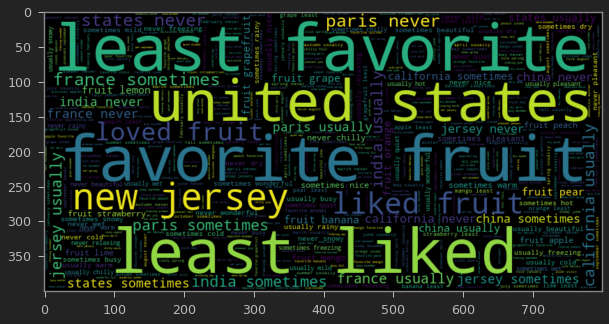

In [21]:
# Plotting the WordCloud
plt.figure(figsize=(10, 10))
map = WordCloud(max_words=2000, width=800, height=400).generate(" ".join(data["english"]))
plt.imshow(map, interpolation="bilinear")

* As shown in the plot above, many people generally speaks about favourite, fruit, liked, least, sometimes , paris, never, china, usually and many more words.

**Tokenization**
* I will tokenize the words present in English Language using word tokenize function and I will calculate the maximum number of characters present in any words in English Language in the DataFrame.

In [22]:
# Tokenization with word tokenize function
max_len = 0
for doc in data["english"]:
  tokens = word_tokenize(doc)
  if (len(tokens)) > max_len:
    max_len = len(tokens)

print(f"The word with largest character is {max_len}")

The word with largest character is 15


**Working on French Language**
* I will perform the same process in the French Language present in the DataFrame.

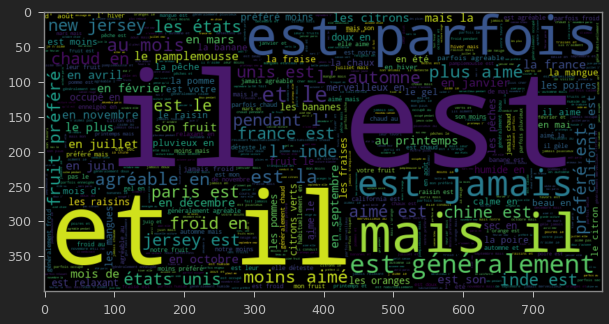

In [23]:
# Working on French Langugage
# Obtaining the list of English words.
words = []
for i in data["french"]:
  for word in i.split():
    words.append(word)

french_words = Counter(words)

# Sorting the Dictionary
sorted_french = sorted(french_words.items(), key=operator.itemgetter(1), reverse=True)

# Separating the key value pairs from the Dictionary
french_word = []
french_count = []

for i in range(len(sorted_french)):
  french_word.append(sorted_french[i][0])
  french_count.append(sorted_french[i][1])


# Barplot using Plotly
fig = px.bar(x = french_word, y = french_count)
fig.show()

# Plotting the WordCloud
plt.figure(figsize=(10, 10))
map = WordCloud(max_words=2000, width=800, height=400).generate(" ".join(data["french"]))
plt.imshow(map, interpolation="bilinear")


* As shown in the BarPlot with Plotly and WordCloud of the French language obtained above, many people generally speaks words like et, est, mais, parfois and many more.

**Tokenization**
* I will tokenize the words present in French Language using word tokenize function and I will calculate the maximum number of characters present in any words in French Language in the DataFrame.

In [24]:
# Tokenization with word tokenize function
max_len = 0
for doc in data["french"]:
  tokens = word_tokenize(doc)
  if (len(tokens)) > max_len:
    max_len = len(tokens)

print(f"The word with largest character is {max_len}")

The word with largest character is 23


#### **Data Preparation with Tokenization and Padding**

* Here, In this Data Preparation process, I will tokenize the Text Data using Tokenizer and generate the sequence of Text using text to sequence function and I will create the padding sequences. Actually Padding sequence enables us to ensure that the sequenced data after tokenization has equal number of shape. I will apply padding to our data by using post sequence.

* Writing the Function for applying the Tokenization and Padding for the Text data present in the DataFrame.

In [25]:
# Writing the Function for Tokenization and Padding 
maxlen_eng = 15
maxlen_fre = 23
def tokenize_padding(x, maxlen):
  tokenizer = Tokenizer(char_level=False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen=maxlen, padding="post")
  return tokenizer, sequences, padded

**Tokenization and Padding**
* I will apply the process of Tokenization and Padding to the English and French language datasets present in the DataFrame using the function defined above.

In [28]:
# Tokenization and Padding of the English Language
X_tokenizer, X_sequences, X_padded = tokenize_padding(data["english"], maxlen_fre)
print(f"The Tokenized version of English Language: \n {data.english[-1:].item} \n {X_padded[-1:]}")

print(" ")

# Tokenization and Padding of the French Langugage
y_tokenizer, y_sequences, y_padded = tokenize_padding(data["french"], maxlen_fre)
print(f"The Tokenized version of French Language: \n {data.french[-1:].item} \n {y_padded[-1:]}")

The Tokenized version of English Language: 
 <bound method IndexOpsMixin.item of 137859    the orange is her favorite fruit  but the bana...
Name: english, dtype: object> 
 [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0]]
 
The Tokenized version of French Language: 
 <bound method IndexOpsMixin.item of 137859    l'orange est son fruit préféré  mais la banane...
Name: french, dtype: object> 
 [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


**Data Preparation**
* I will prepare Training data and Validation or Testing data using Scikit-learn Model Selection modules.

In [29]:
# Preparing Training Data and Validation Data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_padded, test_size=0.1)

# Inspecting the Data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124074, 23), (13786, 23), (124074, 23), (13786, 23))

#### **Model Preparation or Building the Model**

In [32]:
# Building the Model
english_vocab = 199 + 1 # Total unique English words obtained above
french_vocab = 350 + 1 # Toatal unique French words obtained above

# Sequential Model
model = Sequential()
# Embedding 
model.add(Embedding(english_vocab, 256, input_length=maxlen_eng, mask_zero=True))
# Encoder
model.add(Bidirectional(GRU(256)))
model.add(RepeatVector(maxlen_fre))
# Decoder
model.add(Bidirectional(GRU(256, return_sequences=True)))
model.add(TimeDistributed(Dense(512, activation="relu")))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(french_vocab, activation="softmax")))

# Compiling the Model
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Summary of the Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 256)           51200     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               789504    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 23, 512)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 23, 512)           1182720   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 23, 512)           262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 512)           0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 23, 351)          

In [33]:
# Changing the size of target from 2D to 3D
y_train = np.expand_dims(y_train, axis=2)

# Inspecting the shape
y_train.shape

(124074, 23, 1)

**Training the Model**

In [34]:
# Training the Model
model.fit(X_train, y_train, epochs=10, batch_size=1024)

Epoch 1/10
122/122 [==============================] - 44s 364ms/step - loss: 2.3966 - accuracy: 0.5137
Epoch 2/10
122/122 [==============================] - 44s 364ms/step - loss: 1.4639 - accuracy: 0.6266
Epoch 3/10
122/122 [==============================] - 45s 366ms/step - loss: 1.1466 - accuracy: 0.6877
Epoch 4/10
122/122 [==============================] - 45s 367ms/step - loss: 0.9625 - accuracy: 0.7214
Epoch 5/10
122/122 [==============================] - 45s 366ms/step - loss: 0.8442 - accuracy: 0.7466
Epoch 6/10
122/122 [==============================] - 45s 366ms/step - loss: 0.7491 - accuracy: 0.7705
Epoch 7/10
122/122 [==============================] - 45s 366ms/step - loss: 0.6830 - accuracy: 0.7876
Epoch 8/10
122/122 [==============================] - 45s 366ms/step - loss: 0.5984 - accuracy: 0.8114
Epoch 9/10
122/122 [==============================] - 45s 365ms/step - loss: 0.5386 - accuracy: 0.8286
Epoch 10/10
122/122 [==============================] - 45s 365ms/step - l

**Saving the Model**

In [35]:
# Saving the Model
model.save("model.h5")

**Model Evaluation**
* I will evaluate the perfomance of Trained Model in Testing Data.

In [38]:
# Inspecting the shape of Test Data
display(X_test.shape);
# Inspecting the Data
X_test[0]

(13786, 23)

array([ 26, 137,  81, 106,  81,  22, 121,  43,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [39]:
# Predicting the Model
predict = model.predict(X_test)
predict[:2]

array([[[7.2648171e-18, 1.5856253e-07, 1.7196991e-23, ...,
         2.5526711e-19, 1.7515481e-19, 4.4094088e-19],
        [2.4421533e-12, 2.9506134e-03, 7.2288562e-13, ...,
         2.2996206e-14, 1.9391359e-14, 4.1446139e-14],
        [1.0457208e-08, 4.2015186e-04, 1.4794302e-04, ...,
         1.4758314e-11, 6.6466155e-12, 2.0825588e-11],
        ...,
        [1.0000000e+00, 2.1907657e-17, 1.8516331e-11, ...,
         2.0466744e-24, 3.0123396e-25, 2.6639565e-23],
        [1.0000000e+00, 2.1598968e-17, 1.1994669e-11, ...,
         1.0948750e-24, 1.3079212e-25, 1.4547357e-23],
        [1.0000000e+00, 4.9155248e-17, 1.1298574e-11, ...,
         2.0666728e-24, 1.9607575e-25, 2.6010549e-23]],

       [[1.9197550e-20, 2.9864441e-11, 7.4628771e-33, ...,
         3.3158074e-23, 1.2527244e-22, 1.1624015e-21],
        [4.2062802e-14, 1.8331649e-08, 2.3724693e-22, ...,
         7.4050217e-19, 1.5038551e-17, 8.2361123e-17],
        [4.2657444e-10, 7.4650830e-10, 6.9514533e-15, ...,
         2.165

**Functions to make Predictions**
* I will define the Functions required to make the predictions.

In [41]:
# Functions to make Predictions
def prediction(x, x_tokenizer=X_tokenizer, y_tokenizer=y_tokenizer):
  predictions = model.predict(x)[0]
  id_word = {id: word for word, id in y_tokenizer.word_index.items()}
  id_word[0] = ''
  return ' '.join([id_word[j] for j in np.argmax(predictions, 1)])


def pad_text(padded, tokenizer):
  id_word = {id: word for word, id in tokenizer.word_index.items()}
  id_word[0] = ''
  return " ".join([id_word[j] for j in padded])

In [47]:
# Predicting the French Language
for i in range(5):
  print(f"Origingal English word: {pad_text(X_test[i], X_tokenizer)}")
  print(f"\nOriginal French word:\n {pad_text(y_test[i], y_tokenizer)}")
  print(f"\nPredicted French word:\n {prediction(X_test[i:i+1])}")
  print("\n")

Origingal English word: he wanted to go to california last july               

Original French word:
 il voulait aller en juillet dernier en californie               

Predicted French word:
 il voulait aller en en en juillet dernier               


Origingal English word: he dislikes oranges lemons and peaches                 

Original French word:
 il n'aime les oranges les citrons et les pêches              

Predicted French word:
 il n'aime les les les les et les pêches              


Origingal English word: california is sometimes freezing during march but it is never chilly in february          

Original French word:
 la californie est parfois le gel en mars mais il est jamais froid en février        

Predicted French word:
 la californie est parfois le gel en mars mais il est jamais froid en février        


Origingal English word: california is sometimes chilly during february but it is usually dry in december          

Original French word:
 californie est parfois fro